# Depth-First Search (DFS) vs. Breadth-First Search (BFS) in Maze Solving

In this hands-on exercise from the CS50AI Harvard University course, we've explored the differences between Depth-First Search (DFS) and Breadth-First Search (BFS) algorithms in the context of solving a maze.

## Key Observations:

1. **BFS Effectiveness**: We observed that Breadth-First Search successfully found a path from point A to point B in our maze.

2. **State Exploration**: However, BFS needed to explore a large number of states to find the solution.

3. **DFS vs. BFS Trade-offs**:
   - **Memory Usage**: In some cases, DFS may offer memory savings compared to BFS.
   - **State Exploration**: BFS often explores more states than necessary, which can be computationally expensive.

4. **Situational Performance**: It's important to note that the efficiency of these algorithms can vary depending on the specific problem and maze structure.

## Next Steps:

Now that we understand the theoretical differences between DFS and BFS, we'll dive into the practical implementation of these algorithms. We'll examine and write code to implement both Depth-First Search and Breadth-First Search for maze solving.

This coding exercise will help us better understand how these algorithms work in practice and allow us to compare their performance in different scenarios.

In [1]:
%matplotlib inline

In [2]:
import sys

# Define a Node class to represent each state in the maze
# A class is a blueprint for creating objects. It encapsulates data and functions that operate on that data.
class Node():
    # __init__ is a special method in Python classes, also known as a constructor
    # It's called automatically when creating a new instance of the class
    # This method initializes the attributes of the object
    def __init__(self, state, parent, action):
        # self: refers to the instance of the class being created
        # It's used to access and set attributes of the instance
        # state: represents the current position in the maze (e.g., (x, y) coordinates)
        self.state = state
        # parent: refers to the previous Node that led to this one (used for backtracking)
        self.parent = parent
        # action: the move taken to reach this state from the parent (e.g., "up", "down", "left", "right")
        self.action = action
        print(f"Created new Node with state: {state}, action: {action}")

    # Instance method to get the state of the node
    # self is used in all instance methods of a class
    # It allows each instance to have its own set of attributes
    def get_state(self):
        # Simply return the state attribute of this node
        print(f"Getting state: {self.state}")
        return self.state

# Define a StackFrontier class to implement the frontier as a stack (Last-In-First-Out)
# This class will be used to manage the frontier in our DFS algorithm
class StackFrontier():
    # Constructor for the StackFrontier class
    def __init__(self):
        # Initialize an empty list to represent the frontier
        # In Python, lists can be used to implement stacks efficiently
        self.frontier = []
        print("Initialized empty StackFrontier")

    # Method to add a new node to the frontier
    def add(self, node):
        # append adds the node to the end of the list, which will be the top of our stack
        # This implements the "Last-In" part of LIFO
        self.frontier.append(node)
        print(f"Added node with state {node.state} to StackFrontier")
    
    # Method to check if a given state exists in the frontier
    def contains_state(self, state):
        # any() returns True if any element in the iterator satisfies the condition
        # This line checks if any node in the frontier has a state matching the given state
        # It's an efficient way to search through all nodes in the frontier
        result = any(node.state == state for node in self.frontier)
        print(f"Checking if StackFrontier contains state {state}: {result}")
        return result
    
    # Method to check if the frontier is empty
    def empty(self):
        # Returns True if the frontier is empty (length is 0), False otherwise
        # This is used to determine if we've exhausted all possible paths
        result = len(self.frontier) == 0
        print(f"Checking if StackFrontier is empty: {result}")
        return result
    
    # Method to remove and return a node from the frontier
    def remove(self):
        # If the frontier is empty, raise an error
        # This prevents trying to remove from an empty frontier
        if self.empty():
            print("Attempted to remove from empty StackFrontier")
            raise Exception("Empty Frontier")
        # Otherwise, remove and return the last node from the frontier (top of the stack)
        # This implements the "First-Out" part of LIFO
        else:
            # [-1] index gives us the last element of the list
            node = self.frontier[-1]
            # Update the frontier to remove the last element
            self.frontier = self.frontier[:-1]
            print(f"Removed node with state {node.state} from StackFrontier")
            return node

# Define a QueueFrontier class for BFS
# This implements a queue behavior (First-In-First-Out)
class QueueFrontier():
    def __init__(self):
        self.frontier = []
        print("Initialized empty QueueFrontier")

    def add(self, node):
        self.frontier.append(node)
        print(f"Added node with state {node.state} to QueueFrontier")

    def contains_state(self, state):
        result = any(node.state == state for node in self.frontier)
        print(f"Checking if QueueFrontier contains state {state}: {result}")
        return result

    def empty(self):
        result = len(self.frontier) == 0
        print(f"Checking if QueueFrontier is empty: {result}")
        return result

    def remove(self):
        if self.empty():
            print("Attempted to remove from empty QueueFrontier")
            raise Exception("Empty Frontier")
        else:
            # Remove from the beginning of the list for queue behavior
            # This implements the "First-In-First-Out" principle
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            print(f"Removed node with state {node.state} from QueueFrontier")
            return node

# Define a Maze class to handle maze operations
class Maze():
    def __init__(self, contents, frontier_type='stack'):
        self.contents = contents
        self.height = len(contents)
        self.width = max(len(line) for line in contents)
        self.walls = []
        self.start = None
        self.goal = None

        for i in range(self.height):
            row = []
            for j in range(self.width):
                if j < len(contents[i]):
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                else:
                    row.append(True)
            self.walls.append(row)

        self.solution = None
        self.frontier_type = frontier_type

    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        
        print(f"Neighbors for state {state}: {result}")  # Debug print
        return result

    def solve(self):
        """Finds a solution to maze, if one exists using DFS or BFS."""
        self.num_explored = 0
        start = Node(state=self.start, parent=None, action=None)
        frontier = StackFrontier() if self.frontier_type == 'stack' else QueueFrontier()
        frontier.add(start)
        self.explored = set()

        while True:
            if frontier.empty():
                print("Frontier is empty. No solution found.")
                return None

            node = frontier.remove()
            self.num_explored += 1
            print(f"Exploring state: {node.state}, Explored: {self.num_explored}")

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return self.solution

            self.explored.add(node.state)

            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)
                    print(f"Adding state: {state} to frontier with action: {action}")

            print(f"Frontier size: {len(frontier.frontier)}, Explored set size: {len(self.explored)}")

    def print_maze(self):
        for i, row in enumerate(self.walls):
            for j, cell in enumerate(row):
                if (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif cell:
                    print("█", end="")
                else:
                    print(" ", end="")
            print()

def solve_maze(maze_file, algorithm):
    with open(maze_file, 'r') as f:
        contents = f.read().splitlines()
    
    frontier_type = 'stack' if algorithm == 'DFS' else 'queue'
    maze = Maze(contents, frontier_type)
    solution = maze.solve()
    
    if solution:
        return len(solution[0]), maze.num_explored
    else:
        return None, maze.num_explored

In [3]:
with open('maze1.txt', 'r') as f:
    contents = f.read().splitlines()
    print(contents)

['#####B#', '##### #', '####  #', '#### ##', '     ##', 'A######']


### Solving the easy maze

In [4]:
# Read the maze1.txt file
print("Reading maze1.txt file...")
with open('maze1.txt', 'r') as f:
    contents = f.read().splitlines()
print(f"Maze contents: {contents}")

# Create a Maze object
print("Creating Maze object...")
maze = Maze(contents)
print(f"Maze dimensions: {maze.height}x{maze.width}")
print(f"Start position: {maze.start}")
print(f"Goal position: {maze.goal}")

# Solve the maze
print("Starting maze solving process...")
maze.solve()

# Print the solution
if maze.solution is None:
    print("No solution found.")
else:
    actions, cells = maze.solution
    print("Solution found!")
    print(f"Number of steps in solution: {len(actions)}")
    print("Actions:", actions)
    print("Solution path:", cells)
    print(f"Total states explored: {maze.num_explored}")

print("Maze solving process completed.")

Reading maze1.txt file...
Maze contents: ['#####B#', '##### #', '####  #', '#### ##', '     ##', 'A######']
Creating Maze object...
Maze dimensions: 6x7
Start position: (5, 0)
Goal position: (0, 5)
Starting maze solving process...
Created new Node with state: (5, 0), action: None
Initialized empty StackFrontier
Added node with state (5, 0) to StackFrontier
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (5, 0) from StackFrontier
Exploring state: (5, 0), Explored: 1
Neighbors for state (5, 0): [('up', (4, 0))]
Checking if StackFrontier contains state (4, 0): False
Created new Node with state: (4, 0), action: up
Added node with state (4, 0) to StackFrontier
Adding state: (4, 0) to frontier with action: up
Frontier size: 1, Explored set size: 1
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (4, 0) from StackFrontier
Exploring state: (4, 0), Explored: 2
Neighbors for sta

Reading maze1.txt file...
Maze file read. Number of lines: 6
Creating Maze object...
Maze object created. Dimensions: 6x7
Starting maze solving process...
Created new Node with state: (5, 0), action: None
Initialized empty StackFrontier
Added node with state (5, 0) to StackFrontier
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (5, 0) from StackFrontier
Exploring state: (5, 0), Explored: 1
Neighbors for state (5, 0): [('up', (4, 0))]
Checking if StackFrontier contains state (4, 0): False
Created new Node with state: (4, 0), action: up
Added node with state (4, 0) to StackFrontier
Adding state: (4, 0) to frontier with action: up
Frontier size: 1, Explored set size: 1
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (4, 0) from StackFrontier
Exploring state: (4, 0), Explored: 2
Neighbors for state (4, 0): [('down', (5, 0)), ('right', (4, 1))]
Checking if StackFrontier c

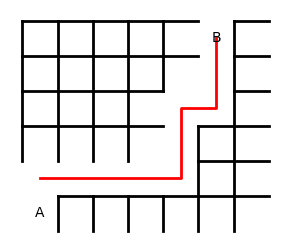

Maze plot completed and displayed.
Maze plotting completed.
All operations completed.


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def plot_maze(maze, path=None):
    print("Starting to plot the maze...")
    plt.figure(figsize=(maze.width/2, maze.height/2))
    plt.axis('off')
    plt.gca().invert_yaxis()
    
    # Plot walls
    print("Plotting maze walls...")
    for i in range(maze.height):
        for j in range(maze.width):
            if maze.walls[i][j]:
                plt.plot([j, j+1], [i, i], 'k-', linewidth=2)
                plt.plot([j, j], [i, i+1], 'k-', linewidth=2)
    print(f"Finished plotting walls. Total walls: {sum(sum(row) for row in maze.walls)}")
    
    # Plot start and end
    print("Plotting start and end points...")
    plt.text(maze.start[1]+0.5, maze.start[0]+0.5, 'A', ha='center', va='center')
    plt.text(maze.goal[1]+0.5, maze.goal[0]+0.5, 'B', ha='center', va='center')
    print(f"Start point: {maze.start}, End point: {maze.goal}")
    
    # Plot solution path
    if path:
        print("Plotting solution path...")
        path_x, path_y = zip(*[(y+0.5, x+0.5) for x, y in path])
        plt.plot(path_x, path_y, 'r-', linewidth=2)
        print(f"Solution path plotted. Path length: {len(path)}")
    
    plt.show()
    print("Maze plot completed and displayed.")

# Read the maze1.txt file
print("Reading maze1.txt file...")
with open('maze1.txt', 'r') as f:
    contents = f.read().splitlines()
print(f"Maze file read. Number of lines: {len(contents)}")

# Create a Maze object
print("Creating Maze object...")
maze = Maze(contents)
print(f"Maze object created. Dimensions: {maze.height}x{maze.width}")

# Solve the maze
print("Starting maze solving process...")
maze.solve()
print(f"Maze solving completed. Total states explored: {maze.num_explored}")

# Print the solution
if maze.solution is None:
    print("No solution found.")
else:
    actions, cells = maze.solution
    print("Solution found!")
    print(f"Number of actions: {len(actions)}")
    print("Actions:", actions)
    print(f"Number of cells in solution path: {len(cells)}")
    print("Solution path:", cells)
    
    # Plot the maze with the solution
    print("Plotting maze with solution...")
    plot_maze(maze, cells)
    print("Maze plotting completed.")

print("All operations completed.")


### Solving the hard maze

In [6]:
with open('maze2.txt', 'r') as f:
    contents = f.read().splitlines()
    print(contents)

['################### # # # #', '#                 # # # # #', '################### # # # #', '#   ##               # # #', '# # ## ### ## ######## # #', '# #    #   ##B        # #', '# # ## ############## # #', '### ##         ##### # #', '###  ########     ## # # #', '###        ## ###### # # #', '###### ###### ####### # #', '###### #####           #', 'A      #################']


In [7]:
# Read the maze2.txt file
print("Reading maze2.txt file...")
with open('maze2.txt', 'r') as f:
    contents = f.read().splitlines()
print(f"Maze contents: {contents}")

# Create a Maze object
print("Creating Maze object...")
maze = Maze(contents)
print(f"Maze dimensions: {maze.height}x{maze.width}")
print(f"Start position: {maze.start}")
print(f"Goal position: {maze.goal}")

print("Maze structure:")
maze.print_maze()

# Solve the maze
print("Starting maze solving process...")
solution = maze.solve()

# Print the solution
if solution is None:
    print("No solution found.")
else:
    actions, cells = solution
    print("Solution found!")
    print(f"Number of steps in solution: {len(actions)}")
    print("Actions:", actions)
    print("Solution path:", cells)
    print(f"Total states explored: {maze.num_explored}")

print("Maze solving process completed.")

Reading maze2.txt file...
Maze contents: ['################### # # # #', '#                 # # # # #', '################### # # # #', '#   ##               # # #', '# # ## ### ## ######## # #', '# #    #   ##B        # #', '# # ## ############## # #', '### ##         ##### # #', '###  ########     ## # # #', '###        ## ###### # # #', '###### ###### ####### # #', '###### #####           #', 'A      #################']
Creating Maze object...
Maze dimensions: 13x27
Start position: (12, 0)
Goal position: (5, 13)
Maze structure:
███████████████████ █ █ █ █
█                 █ █ █ █ █
███████████████████ █ █ █ █
█   ██               █ █ ██
█ █ ██ ███ ██ ████████ █ ██
█ █    █   ██B        █ ███
█ █ ██ ██████████████ █ ███
███ ██         █████ █ ████
███  ████████     ██ █ █ ██
███        ██ ██████ █ █ ██
██████ ██████ ███████ █ ███
██████ █████           ████
A      ████████████████████
Starting maze solving process...
Created new Node with state: (12, 0), action: None
Initialized empt

Reading maze2.txt file...
Maze file read. Number of lines: 13
Creating Maze object...
Maze object created. Dimensions: 13x27
Starting maze solving process...
Created new Node with state: (12, 0), action: None
Initialized empty StackFrontier
Added node with state (12, 0) to StackFrontier
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (12, 0) from StackFrontier
Exploring state: (12, 0), Explored: 1
Neighbors for state (12, 0): [('right', (12, 1))]
Checking if StackFrontier contains state (12, 1): False
Created new Node with state: (12, 1), action: right
Added node with state (12, 1) to StackFrontier
Adding state: (12, 1) to frontier with action: right
Frontier size: 1, Explored set size: 1
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (12, 1) from StackFrontier
Exploring state: (12, 1), Explored: 2
Neighbors for state (12, 1): [('left', (12, 0)), ('right', (12, 2))]


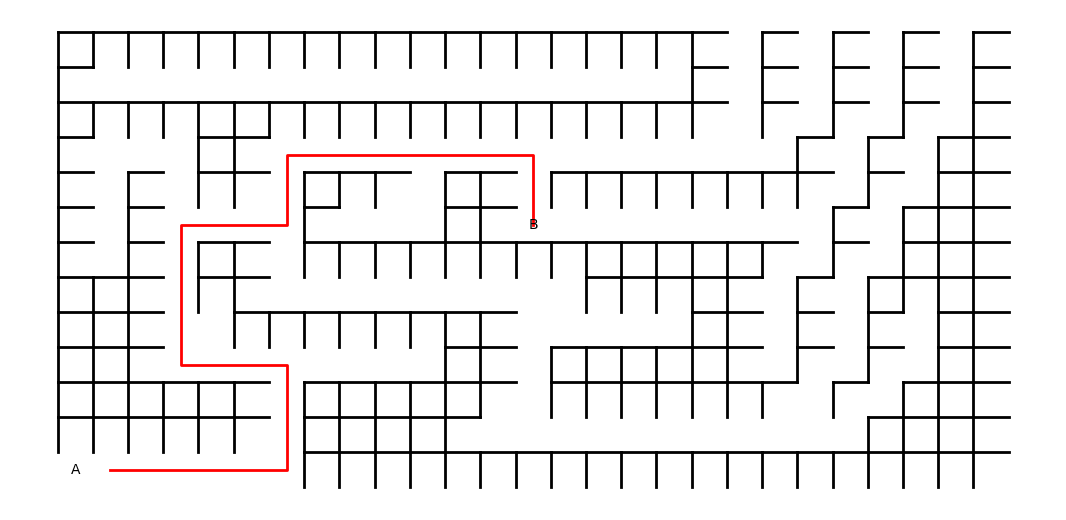

Maze plotting completed.
All operations completed.


In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot_maze(maze, path=None):
    print("Starting to plot the maze...")
    plt.figure(figsize=(maze.width/2, maze.height/2))
    plt.axis('off')
    plt.gca().invert_yaxis()
    
    print("Plotting walls...")
    # Plot walls
    for i in range(maze.height):
        for j in range(maze.width):
            if maze.walls[i][j]:
                plt.plot([j, j+1], [i, i], 'k-', linewidth=2)
                plt.plot([j, j], [i, i+1], 'k-', linewidth=2)
    print(f"Finished plotting walls. Total walls plotted: {sum(sum(row) for row in maze.walls)}")
    
    print("Plotting start and end points...")
    # Plot start and end
    plt.text(maze.start[1]+0.5, maze.start[0]+0.5, 'A', ha='center', va='center')
    plt.text(maze.goal[1]+0.5, maze.goal[0]+0.5, 'B', ha='center', va='center')
    
    # Plot solution path
    if path:
        print(f"Plotting solution path of length {len(path)}...")
        path_x, path_y = zip(*[(y+0.5, x+0.5) for x, y in path])
        plt.plot(path_x, path_y, 'r-', linewidth=2)
    else:
        print("No solution path to plot.")
    
    print("Displaying the maze plot...")
    plt.show()

print("Reading maze2.txt file...")
# Read the maze1.txt file
with open('maze2.txt', 'r') as f:
    contents = f.read().splitlines()
print(f"Maze file read. Number of lines: {len(contents)}")

print("Creating Maze object...")
# Create a Maze object
maze = Maze(contents)
print(f"Maze object created. Dimensions: {maze.height}x{maze.width}")

print("Starting maze solving process...")
# Solve the maze
maze.solve()
print(f"Maze solving completed. Total states explored: {maze.num_explored}")

# Print the solution
if maze.solution is None:
    print("No solution found.")
else:
    actions, cells = maze.solution
    print("Solution found!")
    print(f"Number of actions: {len(actions)}")
    print("Actions:", actions)
    print(f"Number of cells in solution path: {len(cells)}")
    print("Solution path:", cells)
    
    print("Plotting maze with solution...")
    # Plot the maze with the solution
    plot_maze(maze, cells)
    print("Maze plotting completed.")

print("All operations completed.")

# 🔄 Let's Switch Gears: From DFS to BFS! 🧠

Now that we've seen how Depth-First Search (DFS) performs on our maze, let's shake things up a bit! 🎭 We're going to tackle the same maze, but this time with a different approach: Breadth-First Search (BFS).

## Why BFS? 🤔

DFS gave us a solution, sure, but it might have taken the scenic route to get there. 🏞️ It explored more states than necessary, which isn't always ideal. So, we're curious: can BFS do better?

## The BFS Advantage 🚀

BFS has a neat trick up its sleeve:
- It explores all neighbors at the current depth before moving to the next level.
- This strategy often leads to finding the shortest path to the goal. 🏆

## The Magic of Queue 🎩✨

Here's the exciting part: switching from DFS to BFS is surprisingly simple! The core algorithm remains the same, but we make one crucial change:

- DFS uses a stack (Last In, First Out)
- BFS uses a queue (First In, First Out)

This small tweak in the data structure can lead to a big difference in performance!

Are you ready to see BFS in action? Let's dive in and see how it tackles our maze! 🏁

In [9]:
# We will use almost the same code as before, but we will change the frontier to a queue so we convert it from DFS to BFS
import sys

# Define a Node class to represent each state in the maze
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action
        print(f"Created new Node with state: {state}, action: {action}")

    def get_state(self):
        print(f"Getting state: {self.state}")
        return self.state

# Define a StackFrontier class to implement the frontier as a stack (Last-In-First-Out)
class StackFrontier():
    def __init__(self):
        self.frontier = []
        print("Initialized empty StackFrontier")

    def add(self, node):
        self.frontier.append(node)
        print(f"Added node with state {node.state} to StackFrontier")
    
    def contains_state(self, state):
        result = any(node.state == state for node in self.frontier)
        print(f"Checking if StackFrontier contains state {state}: {result}")
        return result
    
    def empty(self):
        result = len(self.frontier) == 0
        print(f"Checking if StackFrontier is empty: {result}")
        return result
    
    def remove(self):
        if self.empty():
            print("Attempted to remove from empty StackFrontier")
            raise Exception("Empty Frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            print(f"Removed node with state {node.state} from StackFrontier")
            return node

# Define a QueueFrontier class for BFS
class QueueFrontier(StackFrontier):
    def remove(self):
        if self.empty():
            print("Attempted to remove from empty QueueFrontier")
            raise Exception("Empty Frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            print(f"Removed node with state {node.state} from QueueFrontier")
            return node

# Define a Maze class to handle maze operations
class Maze():
    def __init__(self, contents, frontier_type='stack'):
        self.contents = contents
        self.height = len(contents)
        self.width = max(len(line) for line in contents)
        self.walls = []
        self.start = None
        self.goal = None

        for i in range(self.height):
            row = []
            for j in range(self.width):
                if j < len(contents[i]):
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                else:
                    row.append(True)
            self.walls.append(row)

        self.solution = None
        self.frontier_type = frontier_type

    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        
        print(f"Neighbors for state {state}: {result}")  # Debug print
        return result

    def solve(self):
        """Finds a solution to maze, if one exists using DFS or BFS."""
        self.num_explored = 0
        start = Node(state=self.start, parent=None, action=None)
        frontier = StackFrontier() if self.frontier_type == 'stack' else QueueFrontier()
        frontier.add(start)
        self.explored = set()

        while True:
            if frontier.empty():
                print("Frontier is empty. No solution found.")
                return None

            node = frontier.remove()
            self.num_explored += 1
            print(f"Exploring state: {node.state}, Explored: {self.num_explored}")

            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return self.solution

            self.explored.add(node.state)

            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)
                    print(f"Adding state: {state} to frontier with action: {action}")

            print(f"Frontier size: {len(frontier.frontier)}, Explored set size: {len(self.explored)}")

    def print_maze(self):
        for i, row in enumerate(self.walls):
            for j, cell in enumerate(row):
                if (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif cell:
                    print("█", end="")
                else:
                    print(" ", end="")
            print()

def solve_maze(maze_file, algorithm):
    with open(maze_file, 'r') as f:
        contents = f.read().splitlines()
    
    frontier_type = 'stack' if algorithm == 'DFS' else 'queue'
    maze = Maze(contents, frontier_type)
    solution = maze.solve()
    
    if solution:
        return len(solution[0]), maze.num_explored
    else:
        return None, maze.num_explored

In [10]:
# Read the maze2.txt file
print("Reading maze2.txt file...")
with open('maze2.txt', 'r') as f:
    contents = f.read().splitlines()
print(f"Maze contents: {contents}")

# Create a Maze object with QueueFrontier for BFS
print("Creating Maze object with QueueFrontier for BFS...")
maze = Maze(contents, frontier_type='queue')
print(f"Maze dimensions: {maze.height}x{maze.width}")
print(f"Start position: {maze.start}")
print(f"Goal position: {maze.goal}")

print("Maze structure:")
maze.print_maze()

# Solve the maze using BFS
print("Starting maze solving process using BFS...")
solution = maze.solve()

# Print the solution
if solution is None:
    print("No solution found.")
else:
    actions, cells = solution
    print("Solution found!")
    print(f"Number of steps in solution: {len(actions)}")
    print("Actions:", actions)
    print("Solution path:", cells)
    print(f"Total states explored: {maze.num_explored}")

print("BFS maze solving process completed.")

# Solve the maze using DFS
print("\nNow solving the maze using DFS...")
maze_dfs = Maze(contents, frontier_type='stack')
solution_dfs = maze_dfs.solve()

# Print the DFS solution
if solution_dfs is None:
    print("No solution found using DFS.")
else:
    actions_dfs, cells_dfs = solution_dfs
    print("DFS Solution found!")
    print(f"Number of steps in DFS solution: {len(actions_dfs)}")
    print("DFS Actions:", actions_dfs)
    print("DFS Solution path:", cells_dfs)
    print(f"Total states explored in DFS: {maze_dfs.num_explored}")

print("DFS maze solving process completed.")

Reading maze2.txt file...
Maze contents: ['################### # # # #', '#                 # # # # #', '################### # # # #', '#   ##               # # #', '# # ## ### ## ######## # #', '# #    #   ##B        # #', '# # ## ############## # #', '### ##         ##### # #', '###  ########     ## # # #', '###        ## ###### # # #', '###### ###### ####### # #', '###### #####           #', 'A      #################']
Creating Maze object with QueueFrontier for BFS...
Maze dimensions: 13x27
Start position: (12, 0)
Goal position: (5, 13)
Maze structure:
███████████████████ █ █ █ █
█                 █ █ █ █ █
███████████████████ █ █ █ █
█   ██               █ █ ██
█ █ ██ ███ ██ ████████ █ ██
█ █    █   ██B        █ ███
█ █ ██ ██████████████ █ ███
███ ██         █████ █ ████
███  ████████     ██ █ █ ██
███        ██ ██████ █ █ ██
██████ ██████ ███████ █ ███
██████ █████           ████
A      ████████████████████
Starting maze solving process using BFS...
Created new Node with state: (

Starting maze solving process using BFS...
Created new Node with state: (12, 0), action: None
Initialized empty StackFrontier
Added node with state (12, 0) to StackFrontier
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (12, 0) from QueueFrontier
Exploring state: (12, 0), Explored: 1
Neighbors for state (12, 0): [('right', (12, 1))]
Checking if StackFrontier contains state (12, 1): False
Created new Node with state: (12, 1), action: right
Added node with state (12, 1) to StackFrontier
Adding state: (12, 1) to frontier with action: right
Frontier size: 1, Explored set size: 1
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (12, 1) from QueueFrontier
Exploring state: (12, 1), Explored: 2
Neighbors for state (12, 1): [('left', (12, 0)), ('right', (12, 2))]
Checking if StackFrontier contains state (12, 0): False
Checking if StackFrontier contains state (12, 2): False
Cre

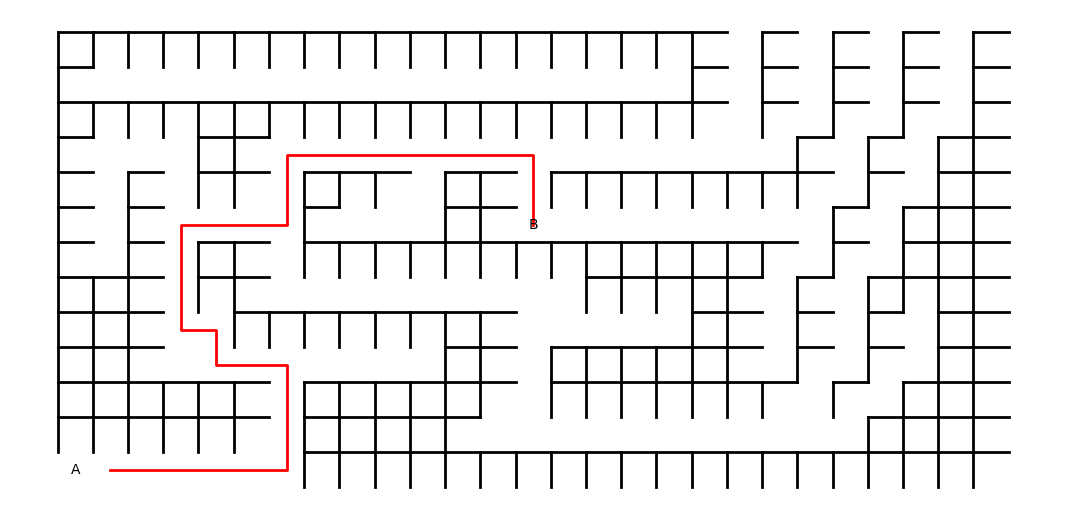

Maze plotting with BFS solution completed.
All BFS operations completed.


In [11]:
# Solve the maze using BFS
print("Starting maze solving process using BFS...")
solution_bfs = maze.solve()

# Print the solution
if solution_bfs is None:
    print("No solution found.")
else:
    actions_bfs, cells_bfs = solution_bfs
    print("Solution found!")
    print(f"Number of steps in solution: {len(actions_bfs)}")
    print("Actions:", actions_bfs)
    print("Solution path:", cells_bfs)
    print(f"Total states explored: {maze.num_explored}")

print("BFS maze solving process completed.")

# Plot the maze with BFS solution
import matplotlib.pyplot as plt
import numpy as np

def plot_maze(maze, path=None):
    print("Starting to plot the maze...")
    plt.figure(figsize=(maze.width/2, maze.height/2))
    plt.axis('off')
    plt.gca().invert_yaxis()
    
    print("Plotting walls...")
    # Plot walls
    for i in range(maze.height):
        for j in range(maze.width):
            if maze.walls[i][j]:
                plt.plot([j, j+1], [i, i], 'k-', linewidth=2)
                plt.plot([j, j], [i, i+1], 'k-', linewidth=2)
    print(f"Finished plotting walls. Total walls plotted: {sum(sum(row) for row in maze.walls)}")
    
    print("Plotting start and end points...")
    # Plot start and end
    plt.text(maze.start[1]+0.5, maze.start[0]+0.5, 'A', ha='center', va='center')
    plt.text(maze.goal[1]+0.5, maze.goal[0]+0.5, 'B', ha='center', va='center')
    
    # Plot solution path
    if path:
        print(f"Plotting solution path of length {len(path)}...")
        path_x, path_y = zip(*[(y+0.5, x+0.5) for x, y in path])
        plt.plot(path_x, path_y, 'r-', linewidth=2)
    else:
        print("No solution path to plot.")
    
    print("Displaying the maze plot...")
    plt.show()

print("Plotting maze with BFS solution...")
# Plot the maze with the solution
if solution_bfs:
    plot_maze(maze, cells_bfs)
    print("Maze plotting with BFS solution completed.")
else:
    print("No solution to plot.")

print("All BFS operations completed.")

# 🏁 Maze Solver Showdown: BFS vs DFS 🧠💨

## A Visual Comparison of Efficiency and Performance 📊🔍

Let's dive into an exciting analysis of Breadth-First Search (BFS) and Depth-First Search (DFS) algorithms, comparing their efficiency in solving our maze. We'll visualize the total steps to solution and states explored, revealing which algorithm reigns supreme for this particular labyrinth! 🏆🔢

Created new Node with state: (5, 0), action: None
Initialized empty StackFrontier
Added node with state (5, 0) to StackFrontier
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (5, 0) from StackFrontier
Exploring state: (5, 0), Explored: 1
Neighbors for state (5, 0): [('up', (4, 0))]
Checking if StackFrontier contains state (4, 0): False
Created new Node with state: (4, 0), action: up
Added node with state (4, 0) to StackFrontier
Adding state: (4, 0) to frontier with action: up
Frontier size: 1, Explored set size: 1
Checking if StackFrontier is empty: False
Checking if StackFrontier is empty: False
Removed node with state (4, 0) from StackFrontier
Exploring state: (4, 0), Explored: 2
Neighbors for state (4, 0): [('down', (5, 0)), ('right', (4, 1))]
Checking if StackFrontier contains state (5, 0): False
Checking if StackFrontier contains state (4, 1): False
Created new Node with state: (4, 1), action: right
Added node with state

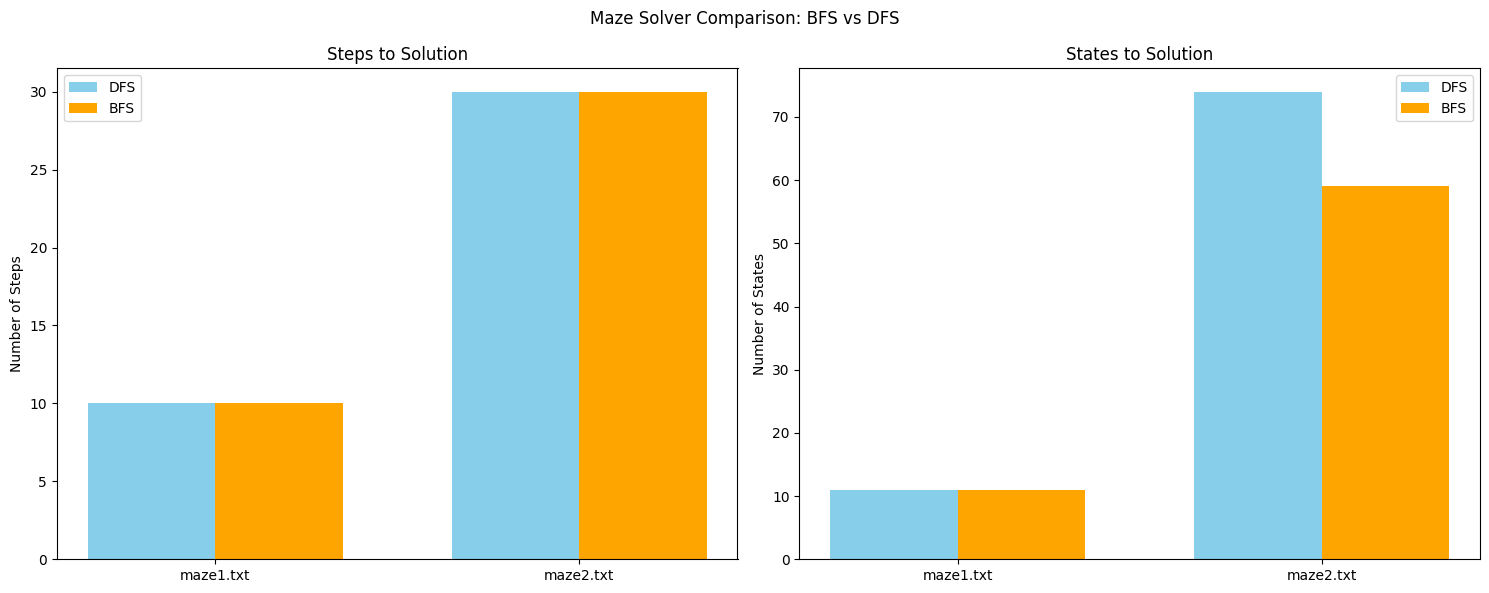

Analysis:

maze1.txt:
- Steps: Both algorithms found paths of the same length (10 steps).
- States Explored: Both algorithms explored the same number of states (11).

maze2.txt:
- Steps: Both algorithms found paths of the same length (30 steps).
- States Explored: BFS explored fewer states (59 vs 74).

Conclusion:
1. The efficiency of each algorithm varies depending on the maze structure.
2. For simple mazes, both algorithms might perform similarly.
3. For more complex mazes:
   - BFS tends to explore fewer states, making it more efficient in terms of memory usage.
   - The path length can be the same or different, depending on the maze structure.
4. This dynamic analysis allows for easy comparison as maze inputs change.
5. Comparing the performance for each maze:
   - For maze1.txt:
     * Steps: BFS needed 10 steps and DFS needed 10 steps. Both have the same efficiency in terms of path length.
     * States: Both algorithms explored the same number of states (11). This indicates that

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def solve_and_measure(maze_file, algorithm):
    with open(maze_file, 'r') as f:
        contents = f.read().splitlines()
    
    frontier_type = 'stack' if algorithm == 'DFS' else 'queue'
    maze = Maze(contents, frontier_type)
    solution = maze.solve()
    
    steps = len(solution[0]) if solution else 0
    states_explored = maze.num_explored
    
    return steps, states_explored

# List of maze files to compare
maze_files = ['maze1.txt', 'maze2.txt']  # Add more maze files here if needed
algorithms = ['DFS', 'BFS']

# Run the algorithms and collect results
results = {}
for maze_file in maze_files:
    results[maze_file] = {}
    for algo in algorithms:
        steps, states = solve_and_measure(maze_file, algo)
        results[maze_file][algo] = {'steps': steps, 'states': states}

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Maze Solver Comparison: BFS vs DFS')

x = np.arange(len(maze_files))
width = 0.35

for i, metric in enumerate(['steps', 'states']):
    dfs_data = [results[maze][algorithms[0]][metric] for maze in maze_files]
    bfs_data = [results[maze][algorithms[1]][metric] for maze in maze_files]
    
    ax = ax1 if metric == 'steps' else ax2
    ax.bar(x - width/2, dfs_data, width, label='DFS', color='skyblue')
    ax.bar(x + width/2, bfs_data, width, label='BFS', color='orange')
    
    ax.set_ylabel(f"Number of {metric.capitalize()}")
    ax.set_title(f"{metric.capitalize()} to Solution")
    ax.set_xticks(x)
    ax.set_xticklabels(maze_files)
    ax.legend()

plt.tight_layout()
plt.show()

# Analysis
print("Analysis:")
for maze in maze_files:
    print(f"\n{maze}:")
    dfs_steps, bfs_steps = results[maze]['DFS']['steps'], results[maze]['BFS']['steps']
    dfs_states, bfs_states = results[maze]['DFS']['states'], results[maze]['BFS']['states']
    
    if dfs_steps == bfs_steps:
        print(f"- Steps: Both algorithms found paths of the same length ({dfs_steps} steps).")
    else:
        print(f"- Steps: {'DFS' if dfs_steps < bfs_steps else 'BFS'} found a shorter path ({min(dfs_steps, bfs_steps)} vs {max(dfs_steps, bfs_steps)}).")
    
    if dfs_states == bfs_states:
        print(f"- States Explored: Both algorithms explored the same number of states ({dfs_states}).")
    else:
        print(f"- States Explored: {'DFS' if dfs_states < bfs_states else 'BFS'} explored fewer states ({min(dfs_states, bfs_states)} vs {max(dfs_states, bfs_states)}).")

print("\nConclusion:")
print("1. The efficiency of each algorithm varies depending on the maze structure.")
print("2. For simple mazes, both algorithms might perform similarly.")
print("3. For more complex mazes:")
print("   - BFS tends to explore fewer states, making it more efficient in terms of memory usage.")
print("   - The path length can be the same or different, depending on the maze structure.")
print("4. This dynamic analysis allows for easy comparison as maze inputs change.")
print("5. Comparing the performance for each maze:")
for maze in maze_files:
    dfs_steps = results[maze]['DFS']['steps']
    bfs_steps = results[maze]['BFS']['steps']
    dfs_states = results[maze]['DFS']['states']
    bfs_states = results[maze]['BFS']['states']
    
    if bfs_steps < dfs_steps:
        step_efficiency = 'BFS is more efficient in terms of path length'
    elif dfs_steps < bfs_steps:
        step_efficiency = 'DFS is more efficient in terms of path length'
    else:
        step_efficiency = 'Both have the same efficiency in terms of path length'
    
    print(f"   - For {maze}:")
    print(f"     * Steps: BFS needed {bfs_steps} steps and DFS needed {dfs_steps} steps. {step_efficiency}.")
    
    if bfs_states < dfs_states:
        print(f"     * States: BFS explored fewer states ({bfs_states} vs {dfs_states}). This means BFS was more memory-efficient, exploring a smaller portion of the maze before finding the solution. It indicates that BFS's breadth-first approach was more suitable for this maze structure, avoiding unnecessary exploration of dead ends.")
    elif dfs_states < bfs_states:
        print(f"     * States: DFS explored fewer states ({dfs_states} vs {bfs_states}). This means DFS was more memory-efficient, exploring a smaller portion of the maze before finding the solution. It suggests that DFS's depth-first approach was more suitable for this maze structure, possibly due to fewer branching paths or a solution located deep in the maze.")
    else:
        print(f"     * States: Both algorithms explored the same number of states ({dfs_states}). This indicates that the maze structure didn't particularly favor either search strategy in terms of memory efficiency.")